In [4]:
from openpyxl import load_workbook

def get_sheetnames_xlsx(filepath):
    wb = load_workbook(filepath, read_only=True, keep_links=False)
    return wb.sheetnames

In [43]:
#get_sheetnames_xlsx('C:/Users/tsb7592/Downloads/dccs_prelim_item_analysis.xlsx' )

In [1]:
#Data saved in csv/excel
import glob, os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
reg = pd.read_csv('C:/Users/tsb7592/Downloads/registration_data_distinct.csv',index_col=0)

In [3]:
reg.shape

(3260, 13)

In [24]:
#reg.columns =['PIN', 'RegistrationID', 'DeviceID', 'Age','Education', 'MothersEducation', 'FathersEducation', 'GuardiansEducation','ExaminerName', 'Gender', 'Handedness', 'Race','Ethnicity']

In [25]:
#reg.to_csv('C:/Users/tsb7592/Downloads/registration_data_distinct.csv')

In [44]:
vr = pd.read_csv('C:/Users/tsb7592/Downloads/VR_norm.csv', index_col=0)

In [46]:
vr.shape

(1181861, 11)

In [47]:
vr.PIN.nunique()

3352

In [28]:
#Change the column tpye from obeject to numeric
#Select the 3 needed key values
data =vr[(vr.Key == 'Score')| (vr.Key == 'Position')]  
data['Value'] =pd.to_numeric(data['Value'])

In [29]:
data = data.pivot_table(index=['RegistrationID','PIN','ItemID','DeviceID','InstrumentID'], columns='Key', values='Value').reset_index()

In [ ]:
df =pd.merge(data, reg, on=['PIN'])

In [4]:
orn = pd.read_csv('C:/Users/tsb7592/Downloads/OR_norm.csv', index_col=0)

In [5]:
orn =orn[orn['ItemID'].str.contains('LARE')]

In [13]:
#Importing the FormWords
xls =  pd.read_excel('C:/Users/tsb7592/Box/Norming Psychometrics/Data Dictionaries/R/OR/OR Forms for Norming 07.08.2020_WithWords.xlsx', sheet_name = "Formatted_Forms")

In [6]:
#orn =orn.drop_duplicates()
orn.shape

(1033656, 11)

In [67]:
#Change the column tpye from obeject to numeric
#Select the 3 needed key values
data =orn[(orn.Key == 'Score')| (orn.Key == 'Position')|(orn.Key =='InstrumentSection') ]
data['Value'] =pd.to_numeric(data['Value'])

In [68]:
data = data.pivot_table(index=['RegistrationID','PIN','ItemID','DeviceID','InstrumentID'], columns='Key', values='Value').reset_index()

In [10]:
data = data[data.InstrumentSection==1]

In [11]:
df =pd.merge(data, reg[['PIN','Age','Education']], on=['PIN'])

In [12]:
df.head()

,RegistrationID,PIN,ItemID,DeviceID,InstrumentID,InstrumentSection,Position,Score,Age,Education
0,000AB98A-683B-4BAF-B95A-50F7DB253184,SDA40009,LARE080,2A74DD06-DE18-4CF3-8568-86E6822D8A06,99E00A8D-3AC2-4C2F-8856-575DA77BD205,1,6,1,49.0,16.0
1,000AB98A-683B-4BAF-B95A-50F7DB253184,SDA40009,LARE092,2A74DD06-DE18-4CF3-8568-86E6822D8A06,99E00A8D-3AC2-4C2F-8856-575DA77BD205,1,4,1,49.0,16.0
2,000AB98A-683B-4BAF-B95A-50F7DB253184,SDA40009,LARE135,2A74DD06-DE18-4CF3-8568-86E6822D8A06,99E00A8D-3AC2-4C2F-8856-575DA77BD205,1,10,0,49.0,16.0
3,000AB98A-683B-4BAF-B95A-50F7DB253184,SDA40009,LARE143,2A74DD06-DE18-4CF3-8568-86E6822D8A06,99E00A8D-3AC2-4C2F-8856-575DA77BD205,1,1,1,49.0,16.0
4,000AB98A-683B-4BAF-B95A-50F7DB253184,SDA40009,LARE144,2A74DD06-DE18-4CF3-8568-86E6822D8A06,99E00A8D-3AC2-4C2F-8856-575DA77BD205,1,5,0,49.0,16.0


In [16]:
#routing forms are everything that contain “Routing_” in the column Form in FormWords. 
#Remember that routing form item IDs overlap with Live Form item IDs so you can’t just do a match across all items taken.
r4=xls[xls['Form'].str.contains("Routing_4")]
r56=xls[xls['Form'].str.contains("Routing_5-6")]
r79=xls[xls['Form'].str.contains("Routing_7-9")]
r10=xls[xls['Form'].str.contains("Routing_10-SC")]
rb=xls[xls['Form'].str.contains('Routing_BachPlus')]

## Filter by different age

In [17]:
df4 = df[df.Age==4]
#filter by age 4 
df4 = df4[(df4.Position >=1) & (df4.Position <=5)]
df4 =pd.merge(df4, r4, on=['ItemID'])

In [18]:
df4.head()

,RegistrationID,PIN,ItemID,DeviceID,InstrumentID,InstrumentSection,Position,Score,Age,Education,Form,Vocabulary
0,01262AFC-6948-4B69-A60B-D939BEB3000F,NBS04006,LARE005,03B9B74E-B65A-4754-893C-EE0825E6762A,0B3F617E-0189-43FD-9110-309F1B6ECF87,1,2,0,4.0,2.0,Routing_4,C
1,06E59330-F29D-42AE-B8F4-D3DC1FE0E422,MAP04007,LARE005,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,6F1054F2-6EF1-4A2D-B5D6-EBA7EE1C5A83,1,3,0,4.0,1.0,Routing_4,C
2,0A4ACA35-B88E-4DF2-8130-7F8C4F1FA768,MSL04012,LARE005,5CECD629-9F82-40E5-A7C0-05014145BC4C,814DB466-D58F-4BEF-AB1B-652182D7CAC8,1,3,1,4.0,2.0,Routing_4,C
3,0B140368-E382-4515-AF0A-6F89B2437EFD,SBM04005,LARE005,1344AC9E-362E-4BA7-AADA-F58BB9D0417F,741DDCE2-29D0-4A84-81CF-91B590CD12FE,1,3,1,4.0,1.0,Routing_4,C
4,0F02271B-4510-4B35-AF1F-15DFA34783F9,MCH04009,LARE005,29A16B75-6850-4FA8-A6AB-21E1BF8587B3,B9AC30AF-E4FC-4654-9517-CCC35020B5B1,1,2,1,4.0,18.0,Routing_4,C


In [19]:
#
df56 =df[(df.Age==5) | (df.Age==6)]
df56 = df56[(df56.Position >=1) & (df56.Position <=10)]
df56 =pd.merge(df56, r56, on=['ItemID'])

In [20]:
df79 =df[(df.Age==7) | (df.Age==8)| (df.Age==9)]
df79 = df79[(df79.Position >=1) & (df79.Position <=10)]
df79 = pd.merge(df79, r79, on=['ItemID'])

In [21]:
df.Education.describe()

count    32826.000000
mean        13.988515
std          7.271274
min          1.000000
25%          8.000000
50%         14.000000
75%         21.000000
max         28.000000
Name: Education, dtype: float64

In [22]:
#For Routing_10-SC, filter 1) Age == 10:17, 
                           #2) Age > 18 & Education == c(1:19, 25:28), 3) Position == 0:9
df10 = df[((df.Age>=10) & (df.Age<=17)) | ((df.Age>=18)&( df.Education<=19 )| ((df.Education>=25)&( df.Education<=28) ))]
#filter by age 4 
df10 = df10[(df10.Position >=1) & (df10.Position <=10)]
df10 =pd.merge(df10, r10, on=['ItemID'])                                                   


In [23]:
#ting_BachPlus, filter 1) Age > 18, 2) Education == 20:24,  3) Position == 1:10

dfb = df[(df.Age>=18)&( df.Education>=20 )& (df.Education<=24)]
#filter by age 4 
dfb = dfb[(dfb.Position >=1) & (dfb.Position <=10)]
dfb =pd.merge(dfb, rb, on=['ItemID'])                                                   


In [24]:
def create_result(df):
    dd =df.groupby(['Form','ItemID','Vocabulary'])['Score'].mean().reset_index()
    ct=df.groupby(['Form','ItemID','Vocabulary'])['Position'].count().reset_index()
    st=df.groupby(['Form','ItemID','Vocabulary'])['Age'].std().reset_index()
    age =df.groupby(['Form','ItemID','Vocabulary'])['Age'].mean().reset_index()
    
    result =pd.merge(dd, ct, on=['Form','ItemID','Vocabulary'])
    result =pd.merge(result, age, on=['Form','ItemID','Vocabulary'])
    result =pd.merge(result, st, on=['Form','ItemID','Vocabulary'])
    result.columns=['Form', 'ItemID', 'Vocabulary', 'Proportion_Correct', 'N','MeanAge','SDAge']
    
    return result

In [31]:
r4 =create_result(df4)
r4.head()

,Form,ItemID,Vocabulary,Proportion_Correct,N,MeanAge,SDAge
0,Routing_4,LARE005,C,0.570000,100,4.0,0.0
1,Routing_4,LARE008,N,0.464646,99,4.0,0.0
2,Routing_4,LARE021,on,0.138614,101,4.0,0.0
3,Routing_4,LARE028,did,0.100000,100,4.0,0.0
4,Routing_4,LARE034,box,0.080808,99,4.0,0.0


In [26]:
rb =create_result(dfb)
rb.head()

,Form,ItemID,Vocabulary,Proportion_Correct,N,MeanAge,SDAge
0,Routing_BachPlus,LARE114,stifle,0.920082,488,51.436475,18.592685
1,Routing_BachPlus,LARE135,viscous,0.445525,514,50.789883,18.625859
2,Routing_BachPlus,LARE144,bucolic,0.723735,514,50.789883,18.625859
3,Routing_BachPlus,LARE172,conscious,0.964981,514,50.789883,18.625859
4,Routing_BachPlus,LARE175,aesthetic,0.926070,514,50.789883,18.625859


In [27]:
r10 =create_result(df10)
r10.head()

,Form,ItemID,Vocabulary,Proportion_Correct,N,MeanAge,SDAge
0,Routing_10-SC,LARE080,meant,0.970106,1706,23.079132,18.524935
1,Routing_10-SC,LARE092,abate,0.877491,1706,23.079132,18.524935
2,Routing_10-SC,LARE135,viscous,0.219775,2134,27.338808,20.874804
3,Routing_10-SC,LARE143,amplify,0.934579,1712,23.030374,18.510875
4,Routing_10-SC,LARE144,bucolic,0.433458,2134,27.338808,20.874804


In [28]:
r56 =create_result(df56)
r56.head()

,Form,ItemID,Vocabulary,Proportion_Correct,N,MeanAge,SDAge
0,Routing_5-6,LARE005,C,0.917051,217,5.534562,0.499957
1,Routing_5-6,LARE008,N,0.876147,218,5.532110,0.500116
2,Routing_5-6,LARE021,on,0.511628,215,5.539535,0.499598
3,Routing_5-6,LARE028,did,0.460829,217,5.539171,0.499616
4,Routing_5-6,LARE034,box,0.585253,217,5.534562,0.499957


In [29]:
r79 =create_result(df79)
r79.head()

,Form,ItemID,Vocabulary,Proportion_Correct,N,MeanAge,SDAge
0,Routing_7-9,LARE028,did,0.967500,400,8.075000,0.816113
1,Routing_7-9,LARE049,much,0.932668,401,8.072319,0.816858
2,Routing_7-9,LARE051,side,0.855000,400,8.075000,0.816113
3,Routing_7-9,LARE081,tough,0.607500,400,8.075000,0.816113
4,Routing_7-9,LARE104,during,0.822500,400,8.075000,0.816113


In [32]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('C:/Users/tsb7592/Downloads/OR_Norming_by_age.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
r4.round(2).to_excel(writer, sheet_name='Routing_4', index=False)
r56.round(2).to_excel(writer, sheet_name='Routing_5-6', index=False)
r79.round(2).to_excel(writer, sheet_name='Routing_7-9', index=False)
r10.round(2).to_excel(writer, sheet_name='Routing_10-SC', index=False)
rb.round(2).to_excel(writer, sheet_name='Routing_BachPlus', index=False)


# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [38]:
rv = r4.append(r56)
rv = rv.append(r79)
rv = rv.append(r10)
rv = rv.append(rb)

In [39]:
rv.head()

,Form,ItemID,Vocabulary,Proportion_Correct,N,MeanAge,SDAge
0,Routing_4,LARE005,C,0.570000,100,4.0,0.0
1,Routing_4,LARE008,N,0.464646,99,4.0,0.0
2,Routing_4,LARE021,on,0.138614,101,4.0,0.0
3,Routing_4,LARE028,did,0.100000,100,4.0,0.0
4,Routing_4,LARE034,box,0.080808,99,4.0,0.0


In [61]:
rv['Form'].values

array(['Routing_4', 'Routing_4', 'Routing_4', 'Routing_4', 'Routing_4',
       'Routing_5-6', 'Routing_5-6', 'Routing_5-6', 'Routing_5-6',
       'Routing_5-6', 'Routing_5-6', 'Routing_5-6', 'Routing_5-6',
       'Routing_5-6', 'Routing_5-6', 'Routing_7-9', 'Routing_7-9',
       'Routing_7-9', 'Routing_7-9', 'Routing_7-9', 'Routing_7-9',
       'Routing_7-9', 'Routing_7-9', 'Routing_7-9', 'Routing_7-9',
       'Routing_10-SC', 'Routing_10-SC', 'Routing_10-SC', 'Routing_10-SC',
       'Routing_10-SC', 'Routing_10-SC', 'Routing_10-SC', 'Routing_10-SC',
       'Routing_10-SC', 'Routing_10-SC', 'Routing_BachPlus',
       'Routing_BachPlus', 'Routing_BachPlus', 'Routing_BachPlus',
       'Routing_BachPlus', 'Routing_BachPlus', 'Routing_BachPlus',
       'Routing_BachPlus', 'Routing_BachPlus', 'Routing_BachPlus'],
      dtype=object)

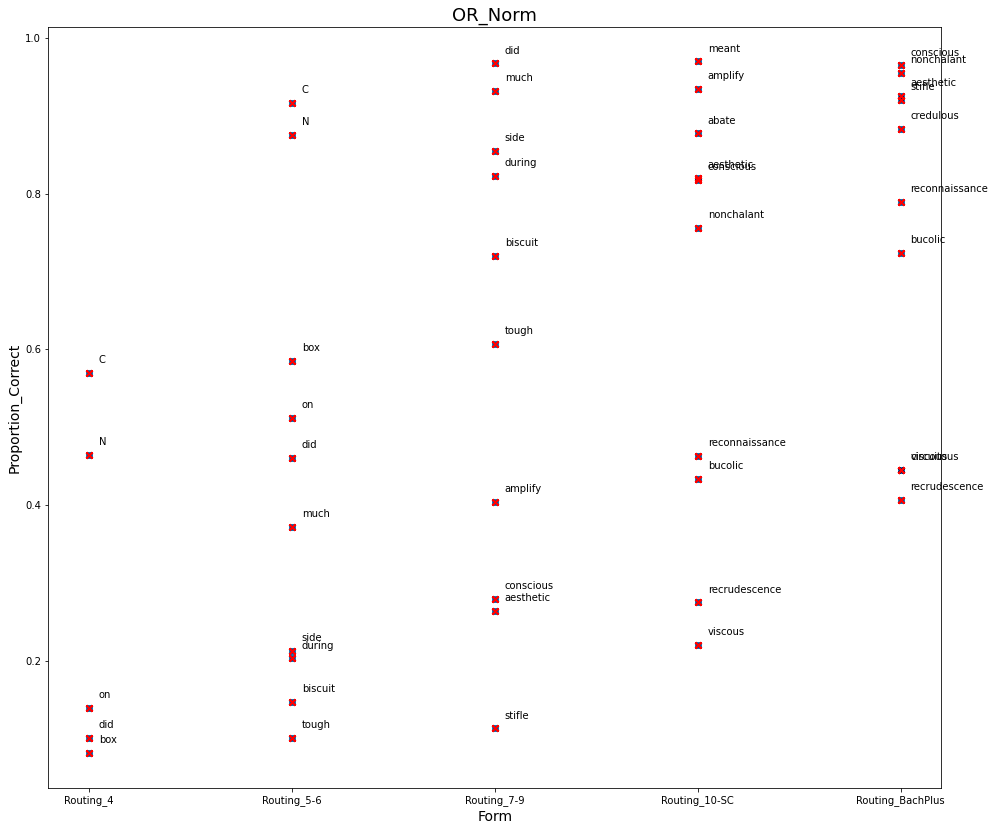

In [66]:
x = rv['Form'].values
y = rv['Proportion_Correct'].values
types = rv.reset_index()['Vocabulary'].values

fig, ax = plt.subplots(figsize=(16,14))
ax.scatter(x, y)

ax.set_xlabel('Form', fontsize=14)
ax.set_ylabel('Proportion_Correct', fontsize=14)
ax.set_title('OR_Norm', fontsize=18)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='red')

# Live item

In [7]:
#Change the column tpye from obeject to numeric
#Select the 3 needed key values
data =orn[(orn.Key == 'Score')| (orn.Key == 'Position')|(orn.Key =='InstrumentSection') ]
data['Value'] =pd.to_numeric(data['Value'])

In [8]:
data = data.pivot_table(index=['RegistrationID','PIN','ItemID','DeviceID','InstrumentID'], columns='Key', values='Value').reset_index()

In [9]:
data = data[data.InstrumentSection!= 1]

In [10]:
df_live =pd.merge(data, reg[['PIN','Age','Education']], on=['PIN'])

In [14]:
form=xls[xls['Form'].str.contains("Form")]
form

,Form,ItemID,Vocabulary
45,Form 2,LARE001,Z
46,Form 2,LARE002,X
47,Form 2,LARE003,P
48,Form 2,LARE004,M
49,Form 2,LARE007,S
...,...,...,...
650,Form 42,LARE263,fringillaceous
651,Form 42,LARE266,brobdingnagian
652,Form 42,LARE272,ranunculaceous
653,Form 42,LARE273,saxifragaceous


In [15]:
dfl4 = df_live[df_live.Age==4]
#filter by age 4 
dfl4 = dfl4[dfl4.Position >5]
dfl4 =pd.merge(dfl4, form, on=['ItemID'])   

In [17]:
dfl4.Form.value_counts()

Form 2     1196
Form 5      732
Form 6      629
Form 3      491
Form 4      344
Form 7      261
Form 8       94
Form 9       52
Form 10      30
Form 11      13
Form 12       8
Name: Form, dtype: int64

In [90]:
#
dfl56 =df_live[(df_live.Age==5) | (df_live.Age==6)]
dfl56 = dfl56[dfl56.Position >10]
dfl56 =pd.merge(dfl56, form, on=['ItemID'])   

In [18]:
dfl79 =df_live[(df_live.Age==7) | (df_live.Age==8)| (df_live.Age==9)]
dfl79 = dfl79[dfl79.Position >10]
#dfl79 =pd.merge(dfl79, form, on=['ItemID'])   

In [20]:
one = dfl79[dfl79.PIN =='MAP09008']

In [25]:
onef = pd.merge(one, form, on=['ItemID'])
onef.drop_duplicates()

,RegistrationID,PIN,ItemID,DeviceID,InstrumentID,InstrumentSection,Position,Score,Age,Education,Form,Vocabulary
0,67487107-1FCD-435A-9FC5-3E63A0EF542D,MAP09008,LARE075,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,81A5F657-6DA6-442B-9CB5-60551792851D,20,24,1,9.0,7.0,Form 13,poet
1,67487107-1FCD-435A-9FC5-3E63A0EF542D,MAP09008,LARE075,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,81A5F657-6DA6-442B-9CB5-60551792851D,20,24,1,9.0,7.0,Form 14,poet
2,67487107-1FCD-435A-9FC5-3E63A0EF542D,MAP09008,LARE075,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,81A5F657-6DA6-442B-9CB5-60551792851D,20,24,1,9.0,7.0,Form 16,poet
3,67487107-1FCD-435A-9FC5-3E63A0EF542D,MAP09008,LARE075,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,81A5F657-6DA6-442B-9CB5-60551792851D,20,24,1,9.0,7.0,Form 20,poet
4,67487107-1FCD-435A-9FC5-3E63A0EF542D,MAP09008,LARE083,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,81A5F657-6DA6-442B-9CB5-60551792851D,20,18,0,9.0,7.0,Form 16,lymph
5,67487107-1FCD-435A-9FC5-3E63A0EF542D,MAP09008,LARE083,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,81A5F657-6DA6-442B-9CB5-60551792851D,20,18,0,9.0,7.0,Form 20,lymph
6,67487107-1FCD-435A-9FC5-3E63A0EF542D,MAP09008,LARE083,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,81A5F657-6DA6-442B-9CB5-60551792851D,20,18,0,9.0,7.0,Form 24,lymph
7,67487107-1FCD-435A-9FC5-3E63A0EF542D,MAP09008,LARE090,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,81A5F657-6DA6-442B-9CB5-60551792851D,20,22,0,9.0,7.0,Form 20,resin
8,67487107-1FCD-435A-9FC5-3E63A0EF542D,MAP09008,LARE090,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,81A5F657-6DA6-442B-9CB5-60551792851D,20,22,0,9.0,7.0,Form 25,resin
9,67487107-1FCD-435A-9FC5-3E63A0EF542D,MAP09008,LARE090,570A856B-E5EC-4DBD-B4EE-B10C51BC919A,81A5F657-6DA6-442B-9CB5-60551792851D,20,22,0,9.0,7.0,Form 30,resin


In [95]:
#For Routing_10-SC, filter 1) Age == 10:17, 
                           #2) Age > 18 & Education == c(1:19, 25:28), 3) Position == 0:9
dfl10 = df_live[((df_live.Age>=10) & (df_live.Age<=17)) | ((df_live.Age>=18)&( df_live.Education<=19 )| ((df_live.Education>=25)&( df_live.Education<=28) ))]
#filter by age 4 
dfl10 = dfl10[dfl10.Position >10]
dfl10=pd.merge(dfl10, form, on=['ItemID'])   

In [104]:
#BachPlus, filter 1) Age > 18, 2) Education == 20:24,  3) Position == 1:10

dflb = df_live[(df_live.Age>=18)&( df_live.Education>=20 )& (df_live.Education<=24)]
#filter by age 4 
dflb = dflb[(dflb.Position >10)]
dflb =pd.merge(dflb, form, on=['ItemID'])   

In [105]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('C:/Users/tsb7592/Downloads/OR_Norming_live_item.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
dfl4.to_excel(writer, sheet_name='4', index=False)
dfl56.to_excel(writer, sheet_name='5-6', index=False)
dfl79.to_excel(writer, sheet_name='7-9', index=False)
dfl10.to_excel(writer, sheet_name='10-SC', index=False)
dflb.to_excel(writer, sheet_name='BachPlus', index=False)


# Close the Pandas Excel writer and output the Excel file.
writer.save()